# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px

# Loading dataset

In [2]:
df= pd.read_csv("hotel_booking.csv")

# Understanding the data and performing Exploratory Data Analysis (EDA)

In [3]:
df = df.drop(['name', 'email', 'phone-number', 'credit_card'], axis=1)

In [4]:
pd.set_option('display.max_columns',32)

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2021,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2021
1,Resort Hotel,0,737,2021,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2021
2,Resort Hotel,0,7,2021,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2021
3,Resort Hotel,0,13,2021,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2021
4,Resort Hotel,0,14,2021,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2021


In [6]:
df.shape

(119390, 32)

In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [9]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [10]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [11]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [12]:
df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [13]:
df['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [14]:
df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

Text(0.5, 1.0, 'Reservation counts by hotels')

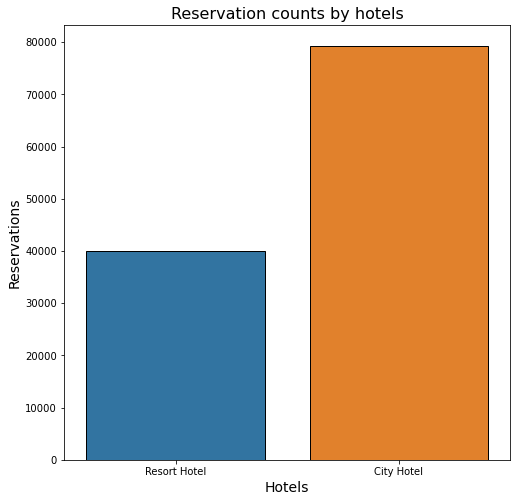

In [15]:
plt.figure(figsize=(8,8))
fig1= sns.countplot(data=df, x='hotel', linewidth=1, edgecolor='black')
fig1.set_xlabel('Hotels', fontsize=14)
fig1.set_ylabel('Reservations', fontsize=14) 
fig1.set_title('Reservation counts by hotels', fontsize=16)

## Almost double the number of guests stayed in City Hotel compared to Resort Hotel

<AxesSubplot:xlabel='hotel', ylabel='count'>

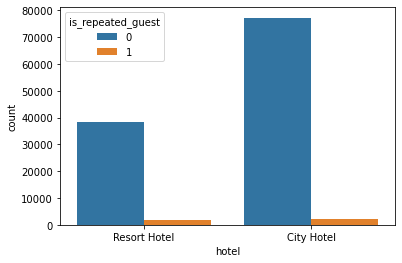

In [16]:
sns.countplot(data=df, x='hotel', hue='is_repeated_guest')

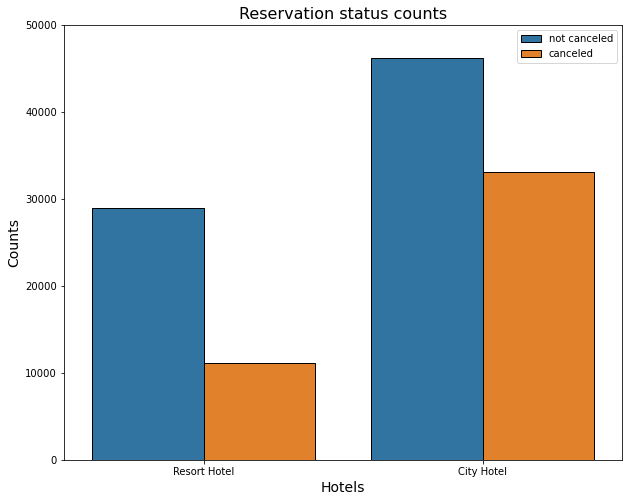

In [17]:
plt.figure(figsize=(10,8))
fig2= sns.countplot(data=df, x='hotel', hue='is_canceled', linewidth=1, edgecolor='black')
fig2.set_xlabel('Hotels', fontsize=14)
fig2.set_ylabel('Counts', fontsize=14) 
fig2.set_title('Reservation status counts', fontsize=16)
fig2.set_ylim(0,50000)
plt.legend(['not canceled','canceled'])

In [18]:
resort= df[df['hotel']=='Resort Hotel']
resort['is_canceled'].value_counts(normalize =True)

0    0.722366
1    0.277634
Name: is_canceled, dtype: float64

In [19]:
city= df[df['hotel']=='City Hotel']
city['is_canceled'].value_counts(normalize =True)

0    0.58273
1    0.41727
Name: is_canceled, dtype: float64

##  The cancelation ratio in City hotel is higher compared to Resort hotel

# Data Preparation

In [20]:
df.isnull().values.any()

True

In [21]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [22]:
df['children'].fillna(0,inplace=True)

In [23]:
df['country'].fillna('NOT',inplace=True)

In [24]:
df.fillna({'agent':0, 'company':0}, inplace= True)

In [25]:
df['meal'].replace('Undefined','SC', inplace=True)

In [26]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [27]:
invalid= df[(df['adults']==0) & (df['children']==0) & (df['babies']==0)]

In [28]:
invalid[['adults','children','babies']]

,adults,children,babies
2224,0,0.0,0
2409,0,0.0,0
3181,0,0.0,0
3684,0,0.0,0
3708,0,0.0,0
...,...,...,...
115029,0,0.0,0
115091,0,0.0,0
116251,0,0.0,0
116534,0,0.0,0


In [29]:
remove= (df['adults']==0) & (df['children']==0) & (df['babies']==0)

In [30]:
data= df[~remove]

In [31]:
data.shape

(119210, 32)

In [32]:
pd.set_option('display.max_columns',32)

In [33]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2021,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2021
1,Resort Hotel,0,737,2021,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2021
2,Resort Hotel,0,7,2021,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2021
3,Resort Hotel,0,13,2021,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2021
4,Resort Hotel,0,14,2021,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2021


# Where do guests come from?

In [34]:
guest_country= data[data['is_canceled']==0]['country'].value_counts().reset_index()
guest_country.columns=['country','number_of_guests']

In [35]:
total_guests= guest_country['number_of_guests'].sum()
guest_country["guests%"]= round(guest_country['number_of_guests']/total_guests *100,2)
guest_country

,country,number_of_guests,guests%
0,PRT,20977,27.97
1,GBR,9668,12.89
2,FRA,8468,11.29
3,ESP,6383,8.51
4,DEU,6067,8.09
...,...,...,...
161,BHR,1,0.00
162,DJI,1,0.00
163,MLI,1,0.00
164,NPL,1,0.00


In [36]:
sum= guest_country['guests%'].iloc[[0,1,2]].sum()
sum

52.15

In [37]:
barplot= go.Bar(x= guest_country['country'], y= guest_country['number_of_guests'])
layout= go.Layout(title= 'Guests by Country')
fig= go.Figure(data=barplot, layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [ ]:
map_guest= px.choropleth(guest_country, 
                         locations= guest_country['country'], 
                         color= guest_country['number_of_guests'], 
                         hover_name= guest_country['country'],
                         title= 'Guests by Country')
map_guest.show()

### More than 50% of the guests are from Portugal, Great Britain, and France

Text(0.5, 1.0, 'Top 10 countries with cancelation')

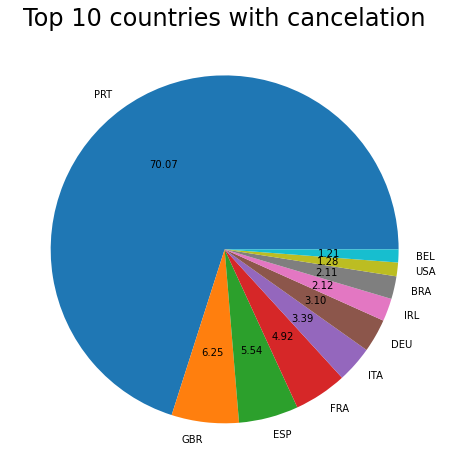

In [39]:
top_10= df[df['is_canceled']==1]['country'].value_counts()[:10]
plt.figure(figsize=(12,8))
plt.pie(top_10, autopct="%.2f",labels=top_10.index)
plt.title('Top 10 countries with cancelation', size =24)

## 70% cancelations are from Portugal 

# How does price per night vary over year?

In [40]:
data['adr']= data['adr']/(data['adults']+data['children']+data['babies'])

C:\Users\Abhi-Mithil\AppData\Local\Temp\ipykernel_5608\1008509335.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
df_resort= data[(data['hotel']=="Resort Hotel") & (data['is_canceled']==0)]
df_city= data[(data['hotel']=="City Hotel") & (data['is_canceled']==0)]

In [42]:
resort= df_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort

,arrival_date_month,adr
0,April,43.598744
1,August,82.450681
2,December,37.485732
3,February,30.747604
4,January,31.094610
5,July,69.813187
6,June,56.049883
7,March,34.017738
8,May,41.997932
9,November,29.920541


In [43]:
city= df_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city

,arrival_date_month,adr
0,April,58.642473
1,August,57.611281
2,December,47.577498
3,February,50.798768
4,January,51.147668
5,July,57.160327
6,June,66.220922
7,March,52.371660
8,May,69.921349
9,November,57.071414


In [44]:
final= resort.merge(city, on='arrival_date_month')
final.columns= ['month', 'resort hotel price', 'city hotel price']
final

,month,resort hotel price,city hotel price
0,April,43.598744,58.642473
1,August,82.450681,57.611281
2,December,37.485732,47.577498
3,February,30.747604,50.798768
4,January,31.094610,51.147668
5,July,69.813187,57.160327
6,June,56.049883,66.220922
7,March,34.017738,52.371660
8,May,41.997932,69.921349
9,November,29.920541,57.071414


In [45]:
order_by= ['January', 'February','March','April','May','June','July','August','September','October','November','December']
final['month']= pd.Categorical(final['month'], categories= order_by, ordered= True)
df_final= final.sort_values('month')
df_final.reset_index(inplace= True)
df_final.drop(columns=['index'],inplace= True)
df_final

,month,resort hotel price,city hotel price
0,January,31.094610,51.147668
1,February,30.747604,50.798768
2,March,34.017738,52.371660
3,April,43.598744,58.642473
4,May,41.997932,69.921349
5,June,56.049883,66.220922
6,July,69.813187,57.160327
7,August,82.450681,57.611281
8,September,50.078346,66.858924
9,October,35.043446,61.709897


In [46]:
fig5= px.line(df_final,
        x='month', 
        y=['resort hotel price', 'city hotel price'], 
        title= 'Room prices per night over months',
        labels={'value':'Average Daily Rate', 'month':'Months'})

fig5.update_layout(title={'text': 'Room Prices Per Night Over Months', 'font': {'size': 24}},
                   legend_title={'text': 'Hotel Type'},
                   template='plotly_white'
)
fig5.update_traces(mode='lines+markers', marker=dict(size=8))

<AxesSubplot:title={'center':'Reservation status per month'}, xlabel='Month', ylabel='Reservations'>

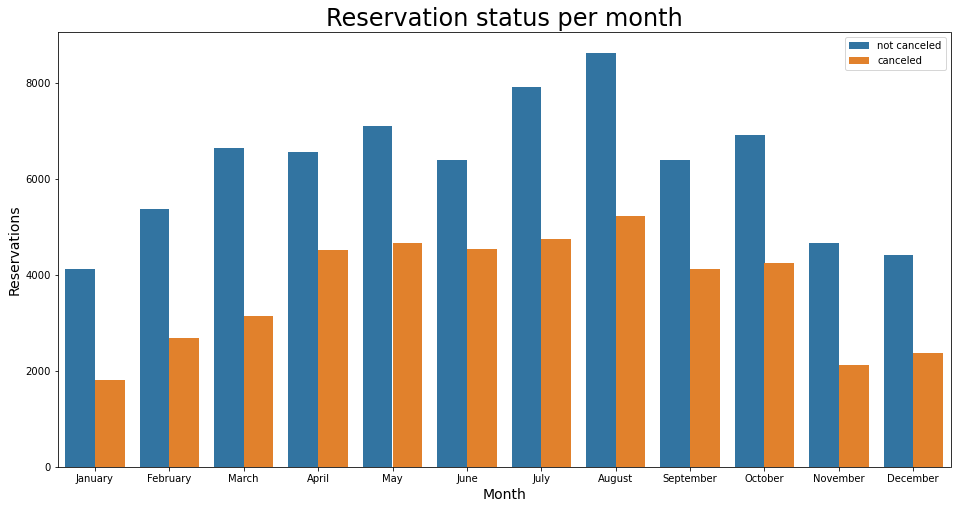

In [47]:
plt.figure(figsize=(16,8))
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)
fig6= sns.countplot(x='arrival_date_month', hue='is_canceled', data=df)
plt.title('Reservation status per month', size=24)
plt.xlabel('Month', size =14)
plt.ylabel('Reservations', size= 14)
plt.legend(['not canceled','canceled'])
fig6

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'ADR')

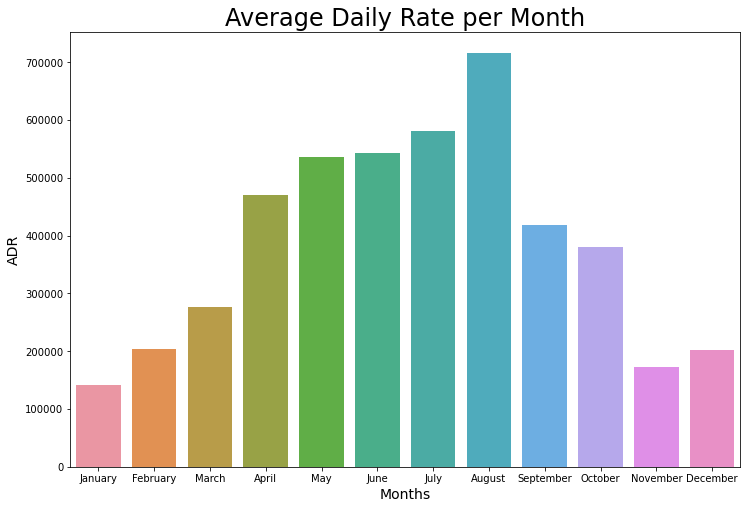

In [48]:
plt.figure(figsize=(12,8))
sns.barplot('arrival_date_month','adr', data=df[df['is_canceled']==1].groupby('arrival_date_month')[['adr']].sum().reset_index())
plt.title('Average Daily Rate per Month', size =24)
plt.xlabel('Months', size=14)
plt.ylabel('ADR', size=14)

### For Resort Hotel the prices gradually increase in the beginning of the year and are at peak in August. Later decreases rapidly

### For City Hotel the prices are changing unevenly where May and September prices are quite close to eachother 

## The average daily rate per person for City hotel is quite high compared to Resort hotel which might be the reason for more cancelations in City hotel

## It is correct to say that high price is directly proportional to high cancelation 

# How much do guests pay for room per night?

In [49]:
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [50]:
valid_guest= data.loc[data['is_canceled']==0]
prices= valid_guest[['hotel', 'reserved_room_type', 'adr']].sort_values('reserved_room_type')
prices

,hotel,reserved_room_type,adr
119389,City Hotel,A,75.60
102432,City Hotel,A,89.55
77019,City Hotel,A,53.00
77020,City Hotel,A,53.00
77021,City Hotel,A,50.40
...,...,...,...
24110,Resort Hotel,H,34.00
354,Resort Hotel,L,37.50
15855,Resort Hotel,L,86.00
911,Resort Hotel,L,100.00


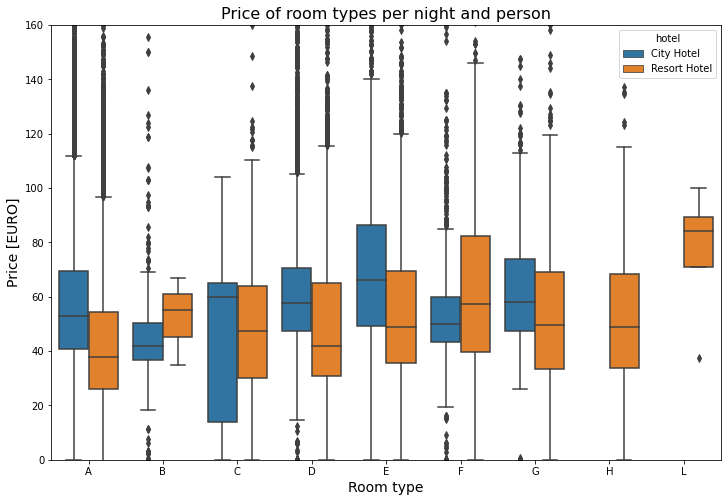

In [51]:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',y='adr', hue='hotel', data= prices)
plt.title('Price of room types per night and person',fontsize= 16)
plt.xlabel('Room type',fontsize= 14)
plt.ylabel('Price [EURO]', fontsize= 14)
plt.ylim(0,160)
plt.show()

# How long do people stay at hotels?

In [52]:
df_night= data[data['is_canceled']==0]
df_night['total_nights']= data['stays_in_week_nights']+ data['stays_in_weekend_nights']
df_night

C:\Users\Abhi-Mithil\AppData\Local\Temp\ipykernel_5608\3252602223.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2021,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.000000,0,0,Check-Out,7/1/2021,0
1,Resort Hotel,0,737,2021,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.000000,0,0,Check-Out,7/1/2021,0
2,Resort Hotel,0,7,2021,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,...,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.000000,0,0,Check-Out,7/2/2021,1
3,Resort Hotel,0,13,2021,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,...,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.000000,0,0,Check-Out,7/2/2021,1
4,Resort Hotel,0,14,2021,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,...,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,49.000000,0,1,Check-Out,7/3/2021,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2023,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,...,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,48.070000,0,0,Check-Out,9/6/2023,7
119386,City Hotel,0,102,2023,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,...,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,75.143333,0,2,Check-Out,9/7/2023,7
119387,City Hotel,0,34,2023,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,...,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,78.855000,0,4,Check-Out,9/7/2023,7
119388,City Hotel,0,109,2023,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,...,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,52.200000,0,0,Check-Out,9/7/2023,7


In [53]:
df_stay= df_night[['total_nights', 'hotel', 'is_canceled']]
df_stay

,total_nights,hotel,is_canceled
0,0,Resort Hotel,0
1,0,Resort Hotel,0
2,1,Resort Hotel,0
3,1,Resort Hotel,0
4,2,Resort Hotel,0
...,...,...,...
119385,7,City Hotel,0
119386,7,City Hotel,0
119387,7,City Hotel,0
119388,7,City Hotel,0


In [54]:
df_total= df_stay.groupby(['hotel', 'total_nights']).agg('count').reset_index()
df_total

,hotel,total_nights,is_canceled
0,City Hotel,0,251
1,City Hotel,1,9155
2,City Hotel,2,10983
3,City Hotel,3,11889
4,City Hotel,4,7694
...,...,...,...
57,Resort Hotel,45,1
58,Resort Hotel,46,1
59,Resort Hotel,56,1
60,Resort Hotel,60,1


In [55]:
df_total.rename(columns={'is_canceled':'number of stays'}, inplace= True)
df_total.head()

,hotel,total_nights,number of stays
0,City Hotel,0,251
1,City Hotel,1,9155
2,City Hotel,2,10983
3,City Hotel,3,11889
4,City Hotel,4,7694


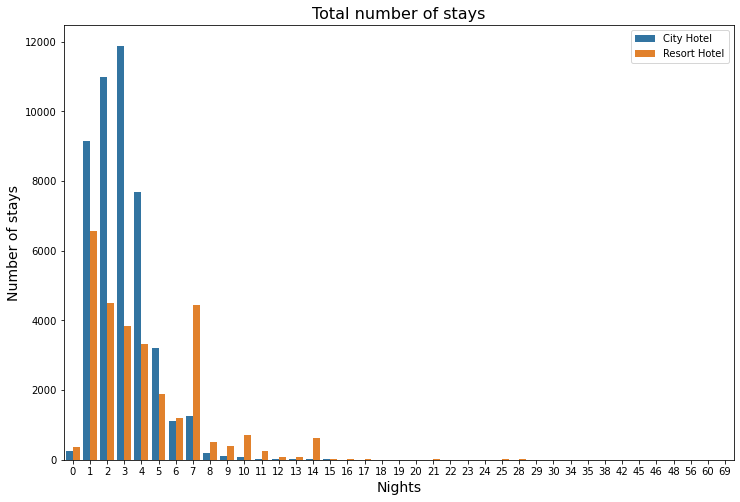

In [56]:
plt.figure(figsize=(12,8))
sns.barplot(x='total_nights',y='number of stays', hue='hotel', data= df_total)
plt.title('Total number of stays',fontsize= 16)
plt.xlabel('Nights',fontsize= 14)
plt.ylabel('Number of stays', fontsize= 14)
plt.legend(loc='upper right')
plt.show()

### Most of the guests prefer to stay between 1-7 nights 

In [57]:
resort_stay= df_total[df_total['hotel']=='Resort Hotel']
resort_stay.head()

,hotel,total_nights,number of stays
27,Resort Hotel,0,371
28,Resort Hotel,1,6579
29,Resort Hotel,2,4488
30,Resort Hotel,3,3828
31,Resort Hotel,4,3321


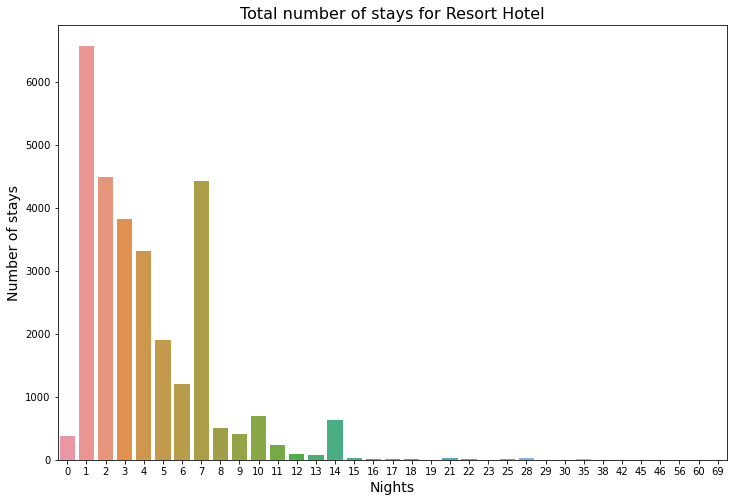

In [58]:
plt.figure(figsize=(12,8))
sns.barplot(x='total_nights',y='number of stays', data= resort_stay)
plt.title('Total number of stays for Resort Hotel',fontsize= 16)
plt.xlabel('Nights',fontsize= 14)
plt.ylabel('Number of stays', fontsize= 14)
plt.show()

### Maximum number of the guests stay for 1 night at Resort Hotel 

In [59]:
city_stay= df_total[df_total['hotel']=='City Hotel']
city_stay

,hotel,total_nights,number of stays
0,City Hotel,0,251
1,City Hotel,1,9155
2,City Hotel,2,10983
3,City Hotel,3,11889
4,City Hotel,4,7694
5,City Hotel,5,3210
6,City Hotel,6,1111
7,City Hotel,7,1245
8,City Hotel,8,205
9,City Hotel,9,119


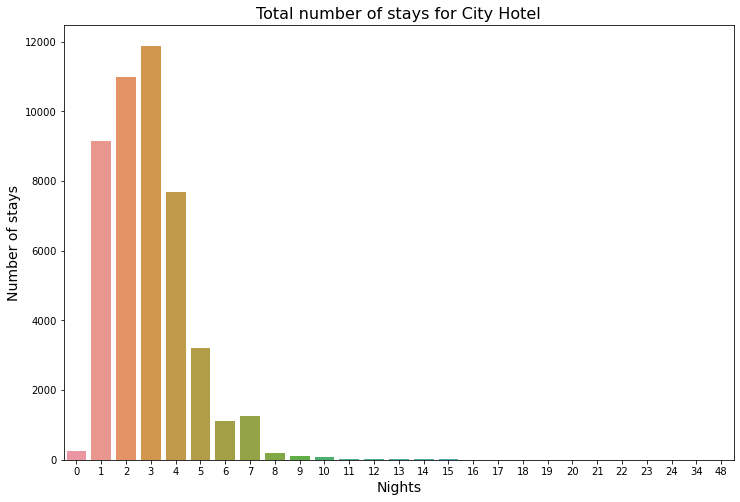

In [60]:
plt.figure(figsize=(12,8))
sns.barplot(x='total_nights',y='number of stays', data= city_stay)
plt.title('Total number of stays for City Hotel',fontsize= 16)
plt.xlabel('Nights',fontsize= 14)
plt.ylabel('Number of stays', fontsize= 14)
plt.show()

### Maximum number of the guests stays for 3 nights at City Hotel  

# How do guests book the hotels?

In [61]:
segment= data['market_segment'].value_counts()
segment

Online TA        56408
Offline TA/TO    24182
Groups           19791
Direct           12582
Corporate         5282
Complementary      728
Aviation           235
Undefined            2
Name: market_segment, dtype: int64

In [62]:
data['market_segment'].value_counts(normalize= True)

Online TA        0.473182
Offline TA/TO    0.202852
Groups           0.166018
Direct           0.105545
Corporate        0.044308
Complementary    0.006107
Aviation         0.001971
Undefined        0.000017
Name: market_segment, dtype: float64

In [63]:
data[data['is_canceled']==1]['market_segment'].value_counts(normalize= True)

Online TA        0.469128
Groups           0.273626
Offline TA/TO    0.187832
Direct           0.043757
Corporate        0.022421
Complementary    0.002014
Aviation         0.001176
Undefined        0.000045
Name: market_segment, dtype: float64

In [64]:
fig= px.pie(segment, 
            values=segment.values,
            names=segment.index,
            title= 'Bookings per market segment',
            template='seaborn')
fig.update_traces(textinfo= 'percent+label')
fig.show()

### More than 65% of the guests book the hotels from online/offline travel agents 

# How many bookings were canceled?

In [65]:
cancel= data['is_canceled']==1
not_cancel= data['is_canceled']==0

In [66]:
print(cancel.sum())
print(not_cancel.sum())

44199
75011


In [67]:
resort_cancel= data.loc[data['hotel']== 'Resort Hotel'] ['is_canceled'].sum()
city_cancel= data.loc[data['hotel']== 'City Hotel']['is_canceled'].sum()

In [68]:
resort_cancel

11120

In [69]:
city_cancel

33079

# Which month has highest number of cancelations?

In [70]:
res_book= data.loc[(data['hotel']=='Resort Hotel')].groupby('arrival_date_month')['hotel'].count()
res_cancel= data.loc[(data['hotel']=='Resort Hotel')].groupby('arrival_date_month')['is_canceled'].sum()

city_book= data.loc[(data['hotel']=='City Hotel')].groupby('arrival_date_month')['hotel'].count()
city_cancel= data.loc[(data['hotel']=='City Hotel')].groupby('arrival_date_month')['is_canceled'].sum()

In [71]:
df_res_cancel= pd.DataFrame({'Hotel':'Resort Hotel',
                             'Month': list(res_book.index),
                             'Bookings': list(res_book.values),
                             'Cancelations': list(res_cancel.values)})

df_city_cancel= pd.DataFrame({'Hotel':'City Hotel',
                             'Month': list(city_book.index),
                             'Bookings': list(city_book.values),
                             'Cancelations': list(city_cancel.values)})

In [72]:
cancel_data= pd.concat([df_res_cancel, df_city_cancel], ignore_index= True)
cancel_data

,Hotel,Month,Bookings,Cancelations
0,Resort Hotel,April,3609,1059
1,Resort Hotel,August,4894,1637
2,Resort Hotel,December,2645,631
3,Resort Hotel,February,3102,794
4,Resort Hotel,January,2191,325
5,Resort Hotel,July,4573,1436
6,Resort Hotel,June,3044,1007
7,Resort Hotel,March,3334,763
8,Resort Hotel,May,3559,1024
9,Resort Hotel,November,2435,460


In [73]:
order_by= ['January', 'February','March','April','May','June','July','August','September','October','November','December']
cancel_data['Month']= pd.Categorical(cancel_data['Month'], categories= order_by, ordered= True)
df_cancel= cancel_data.sort_values('Month')
df_cancel.reset_index(inplace= True)
df_cancel.drop(columns=['index'],inplace= True)
df_cancel

,Hotel,Month,Bookings,Cancelations
0,Resort Hotel,January,2191,325
1,City Hotel,January,3730,1481
2,Resort Hotel,February,3102,794
3,City Hotel,February,4950,1899
4,Resort Hotel,March,3334,763
5,City Hotel,March,6434,2385
6,Resort Hotel,April,3609,1059
7,City Hotel,April,7469,3459
8,City Hotel,May,8221,3653
9,Resort Hotel,May,3559,1024


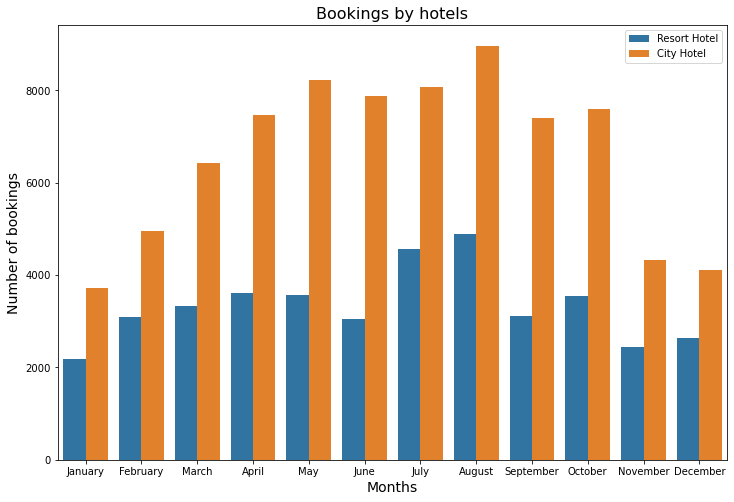

In [74]:
plt.figure(figsize=(12,8))
sns.barplot(x='Month',y='Bookings', hue='Hotel', data= df_cancel)
plt.title('Bookings by hotels',fontsize= 16)
plt.xlabel('Months',fontsize= 14)
plt.ylabel('Number of bookings', fontsize= 14)
plt.legend(loc='upper right')
plt.show()

### Highest bookings for both the hotels was in August 

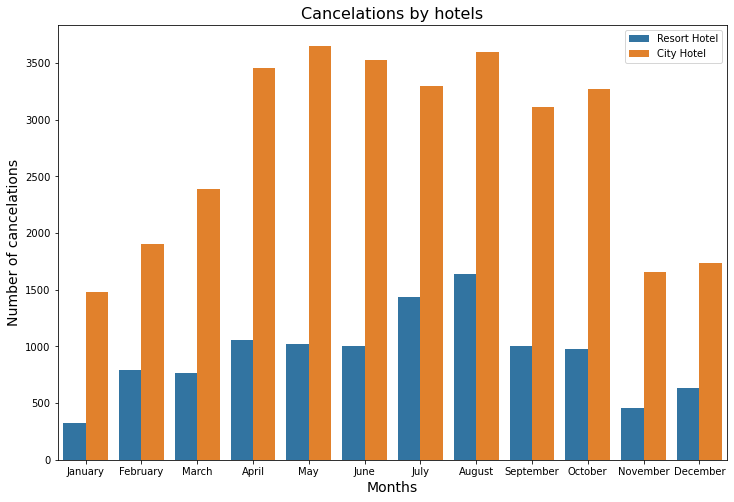

In [75]:
plt.figure(figsize=(12,8))
sns.barplot(x='Month',y='Cancelations', hue='Hotel', data= df_cancel)
plt.title('Cancelations by hotels',fontsize= 16)
plt.xlabel('Months',fontsize= 14)
plt.ylabel('Number of cancelations', fontsize= 14)
plt.legend(loc='upper right')
plt.show()

### Highest cancelation for Resort hotel was in August and City hotel cancellations were quite close for May and August